In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import gridspec

In [2]:
def laplace_solution(x,y,nTerms,Lx,Ly,phi0):
    '''Function for the analytical solution to Laplace equation'''
    Nx=len(x)
    Ny=len(y)
    phi=np.zeros((Nx,Ny))
    
    for n in range(1,2*nTerms,2):
        phi+=(phi0*4./(n*np.pi)) * (np.sin(n*np.pi*x/Lx)) * np.sinh(n*np.pi*y/Lx) / np.sinh(n*np.pi*Ly/Lx)
        
    return phi
        

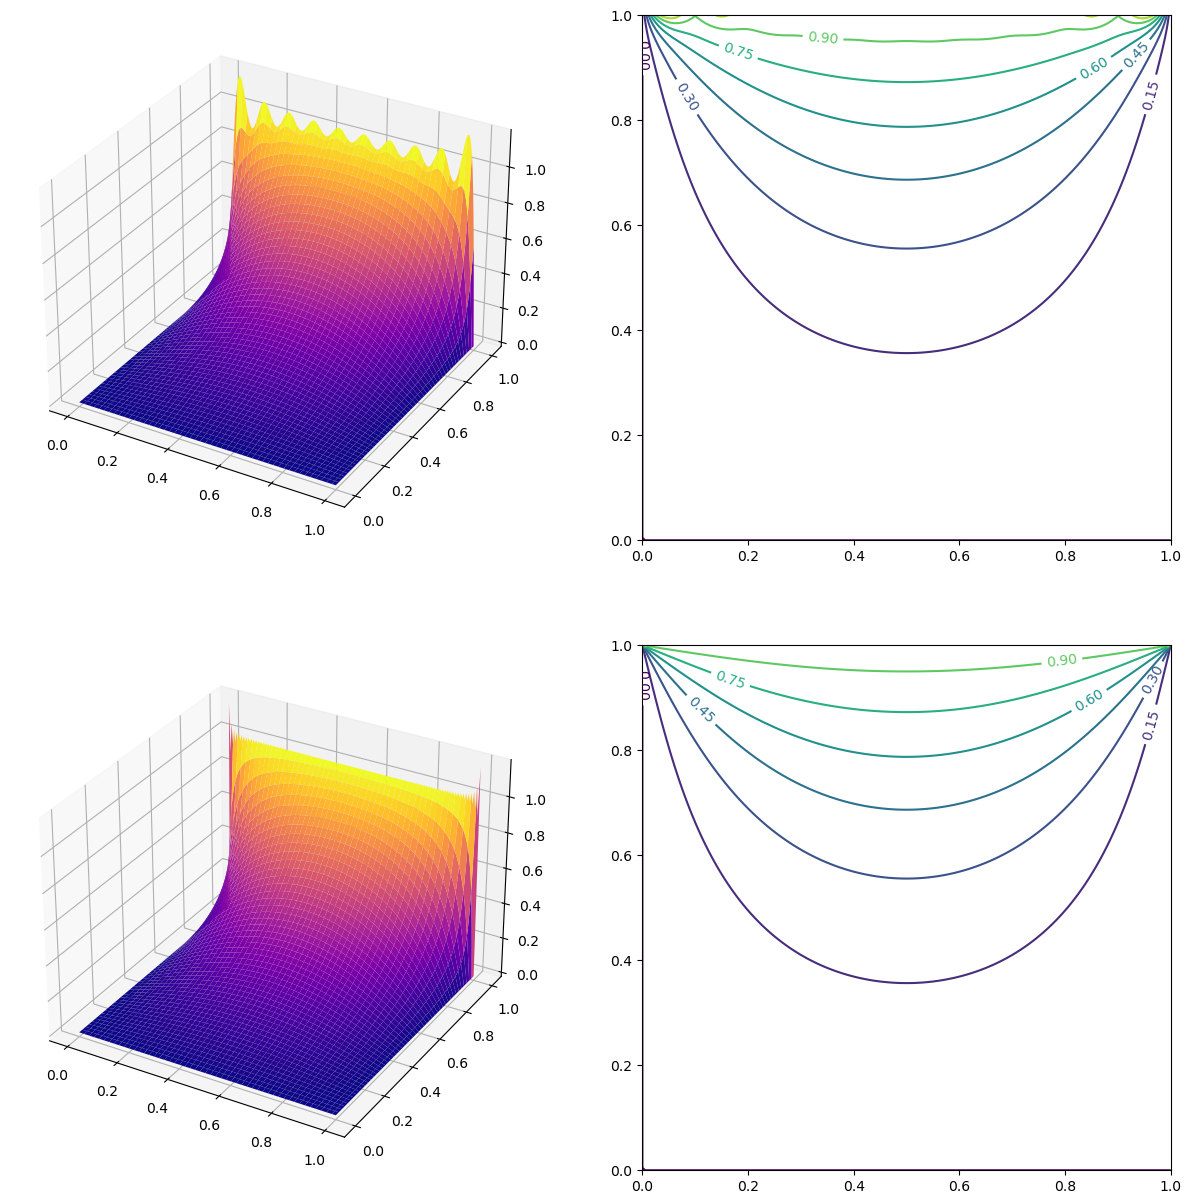

In [6]:
Lx = 1.
Ly = 1.
x=np.linspace(0,Lx,200)
y=np.linspace(0,Ly,200)
nTerms = 10
phi0=1.

xx,yy=np.meshgrid(x,y)

phi=laplace_solution(xx,yy,nTerms,Lx,Ly,phi0)

nTerms =100
phi_20=laplace_solution(xx,yy,nTerms,Lx,Ly,phi0)

# Plots
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax1 = fig.add_subplot(2, 2, 2,)
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax3 = fig.add_subplot(2, 2, 4,)

# 3D plots:
mycmap=cm.plasma
ax0.plot_surface(xx,yy,phi,cmap=mycmap)
ax2.plot_surface(xx,yy,phi_20,cmap=mycmap)

# Contour plots
CS=ax1.contour(xx,yy,phi)
ax1.clabel(CS)
CS_20=ax3.contour(xx,yy,phi_20)
ax3.clabel(CS_20)

plt.savefig('laplace_analytic.pdf',bbox_inches='tight')
plt.show()